In [18]:
mat = np.loadtxt("datas1.2.csv", delimiter=",",dtype=str)

In [4]:
whos

Variable      Type       Data/Info
----------------------------------
Les_donnees   ndarray    77x8: 616 elems, type `float64`, 4928 bytes
a             ndarray    6: 6 elems, type `float64`, 48 bytes
ind           tuple      n=1
mat           dict       n=8
np            module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt           module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sio           module     <module 'scipy.io' from '<...>es/scipy/io/__init__.py'>


1. Effectuer la régression de la variable autisme en fonction de toutes les autres.

$$
X^\top X \hat \alpha = X^\top y
$$

In [153]:
Age=mat[:,11]
for i in range(len(Age)):
    if (Age[i]=='?'):
        Age[i]='29'

In [154]:
X = np.array(mat[1:,:15], dtype=int)
y = np.array(mat[1:,18], dtype=int)

In [155]:
a = np.linalg.solve(X.T@X, X.T@y)
a

array([ 0.11051792,  0.06815256,  0.07691009,  0.15998014,  0.06753461,
        0.07252544,  0.02278004,  0.07960953,  0.15090942,  0.10782116,
       -0.07692308,  0.00260932, -0.05962145,  0.14584399,  0.00754975])

3\. Calculer les résidus de la régression
$$
\varepsilon = y - X\hat \alpha
$$

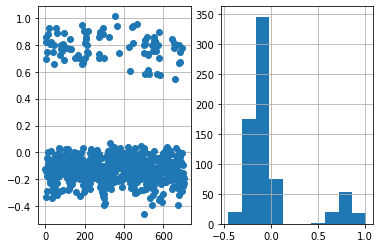

In [156]:
e = y-X@a
plt.subplot(1,2,1)
plt.plot(e,'o')
plt.grid()
plt.subplot(1,2,2)
plt.hist(e)
plt.grid()
plt.show()

4\. Calculer la somme des carrés totaux, la somme des carré des résidus et la somme des carrés de la partie expliquée du modèle

In [157]:
SCT = np.sum((y-np.mean(y))**2)
SCM = np.sum((X@a-np.mean(y))**2)
SCR = e.T@e
SCT, SCM, SCR

(79.23721590909093, 6.59970802021218, 71.43261240445021)

5\. Quelle est la qualité de la régression ?

In [160]:
R2 = 1-SCR/SCT
R2

0.09849669016128693

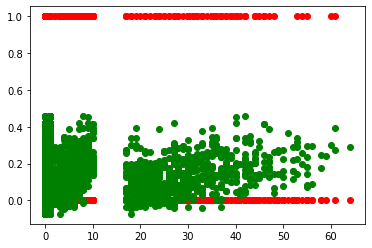

In [162]:
plt.plot(X,y,'or')
z=X@a
plt.plot(X,z,'og')
plt.show()